<h3>First, we have to separate 20% of records 
from our dataset in order to give it to our validation team</h3>

In [49]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split

all_data = pd.read_csv('data/credit_score.csv')

train, validation = train_test_split(all_data, test_size=0.2, stratify=all_data['DEFAULT'], random_state=10)

In [3]:
train.shape, validation.shape

((800, 87), (200, 87))

(300.0, 801.0)

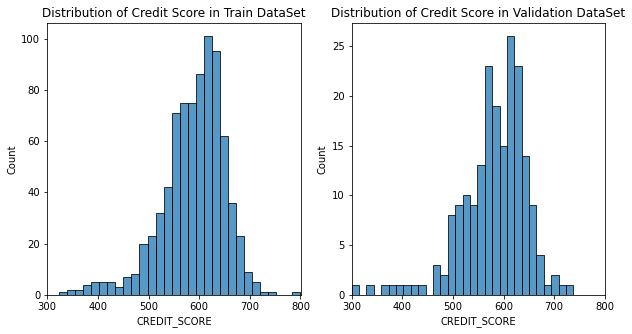

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10,5))

sns.histplot(data=train, x = 'CREDIT_SCORE',bins = 30, ax=axes[0])
axes[0].set_title('Distribution of Credit Score in Train DataSet')
axes[0].set_xlim(300, 801)

sns.histplot(data=validation, x = 'CREDIT_SCORE',bins = 30, ax=axes[1])
axes[1].set_title('Distribution of Credit Score in Validation DataSet')
axes[1].set_xlim(300, 801)

Text(0.5, 1.0, 'Distribution of Default in Validation DataSet')

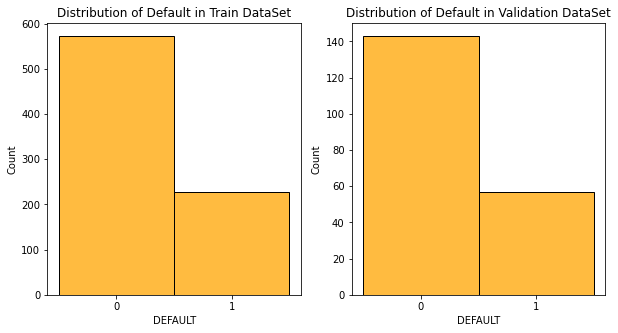

In [5]:
fig, axes = plt.subplots(1, 2,figsize=(10,5))

sns.histplot(data=train, x = 'DEFAULT',discrete=True, color='orange', ax=axes[0])
axes[0].set_xticks([0,1])
axes[0].set_title('Distribution of Default in Train DataSet')

sns.histplot(data=validation, x = 'DEFAULT',discrete=True, color='orange', ax=axes[1])
axes[1].set_xticks([0,1])
axes[1].set_title('Distribution of Default in Validation DataSet')




So, our dataset is perfectly separated into 2 parts: our dataseet and dataset for our validation team

In [6]:
train.to_csv('data/data.csv', index=False)
validation.to_csv('data/validation.csv', index=False)

<h3>General information</h3>

In [50]:
data=pd.read_csv('data/data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 87 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CUST_ID                  800 non-null    object 
 1   INCOME                   800 non-null    int64  
 2   SAVINGS                  800 non-null    int64  
 3   DEBT                     800 non-null    int64  
 4   R_SAVINGS_INCOME         800 non-null    float64
 5   R_DEBT_INCOME            800 non-null    float64
 6   R_DEBT_SAVINGS           800 non-null    float64
 7   T_CLOTHING_12            800 non-null    int64  
 8   T_CLOTHING_6             800 non-null    int64  
 9   R_CLOTHING               800 non-null    float64
 10  R_CLOTHING_INCOME        800 non-null    float64
 11  R_CLOTHING_SAVINGS       800 non-null    float64
 12  R_CLOTHING_DEBT          800 non-null    float64
 13  T_EDUCATION_12           800 non-null    int64  
 14  T_EDUCATION_6            8

<h3>Important information:</h3>
<ul>
<li>There are no NULLs in our dataset</li>
<li>There are 87 columns (85 are numeric and 2(CUST_ID, CAT_GAMBLING) are object)</li>
<li>Data frame contains information on customer_id, income, savings, debt, spending on clothing, taxes,health, education, entertainment, groceries, fines, on gambling, on housing, on services, and on travel in the last 6 and 12 months. Other columns are just ratios of different columns </li>
</ul>


<h3>Correlation matrix</h3>

In [8]:
cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)
cor_matrix

C:\Users\Huawei\AppData\Local\Temp\ipykernel_21276\2731314149.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  cor_matrix = data.corr().style.background_gradient(cmap='coolwarm').set_precision(4)


<p>There are several pairs of variables that are highly correlated with each other (correlation coefficient >=0.95). 
These variables are:
<ul>
<li> as expected mostly _12 and _6 stats </li>
<li> INCOME and EXPENDITURE</li>
<li> UTILITIES_DEBT and GROCERIES_DEBT</li>
<li> </li>
</ul>
</p>

In [33]:
data.corr()[(1.0>data.corr()) & (data.corr()>0.95)].stack()

INCOME              T_EXPENDITURE_12      0.985289
                    T_EXPENDITURE_6       0.957451
T_EDUCATION_12      T_EDUCATION_6         0.999995
T_EDUCATION_6       T_EDUCATION_12        0.999995
T_ENTERTAINMENT_12  T_ENTERTAINMENT_6     0.982849
T_ENTERTAINMENT_6   T_ENTERTAINMENT_12    0.982849
T_GAMBLING_12       T_GAMBLING_6          0.994477
T_GAMBLING_6        T_GAMBLING_12         0.994477
T_GROCERIES_12      T_GROCERIES_6         0.990923
T_GROCERIES_6       T_GROCERIES_12        0.990923
R_GROCERIES_DEBT    R_UTILITIES_DEBT      0.958344
T_HOUSING_12        T_HOUSING_6           1.000000
T_HOUSING_6         T_HOUSING_12          1.000000
T_TAX_12            T_TAX_6               0.995570
T_TAX_6             T_TAX_12              0.995570
T_UTILITIES_12      T_UTILITIES_6         0.999990
T_UTILITIES_6       T_UTILITIES_12        0.999990
R_UTILITIES_DEBT    R_GROCERIES_DEBT      0.958344
T_EXPENDITURE_12    INCOME                0.985289
                    T_EXPENDITU

<h3>Distributions of features</h3>

array([[<AxesSubplot:title={'center':'INCOME'}>,
        <AxesSubplot:title={'center':'SAVINGS'}>,
        <AxesSubplot:title={'center':'DEBT'}>,
        <AxesSubplot:title={'center':'R_SAVINGS_INCOME'}>],
       [<AxesSubplot:title={'center':'R_DEBT_INCOME'}>,
        <AxesSubplot:title={'center':'R_DEBT_SAVINGS'}>,
        <AxesSubplot:title={'center':'T_CLOTHING_12'}>,
        <AxesSubplot:title={'center':'T_CLOTHING_6'}>],
       [<AxesSubplot:title={'center':'R_CLOTHING'}>,
        <AxesSubplot:title={'center':'R_CLOTHING_INCOME'}>,
        <AxesSubplot:title={'center':'R_CLOTHING_SAVINGS'}>,
        <AxesSubplot:title={'center':'R_CLOTHING_DEBT'}>],
       [<AxesSubplot:title={'center':'T_EDUCATION_12'}>,
        <AxesSubplot:title={'center':'T_EDUCATION_6'}>,
        <AxesSubplot:title={'center':'R_EDUCATION'}>,
        <AxesSubplot:title={'center':'R_EDUCATION_INCOME'}>],
       [<AxesSubplot:title={'center':'R_EDUCATION_SAVINGS'}>,
        <AxesSubplot:title={'center':'R_EDUCA

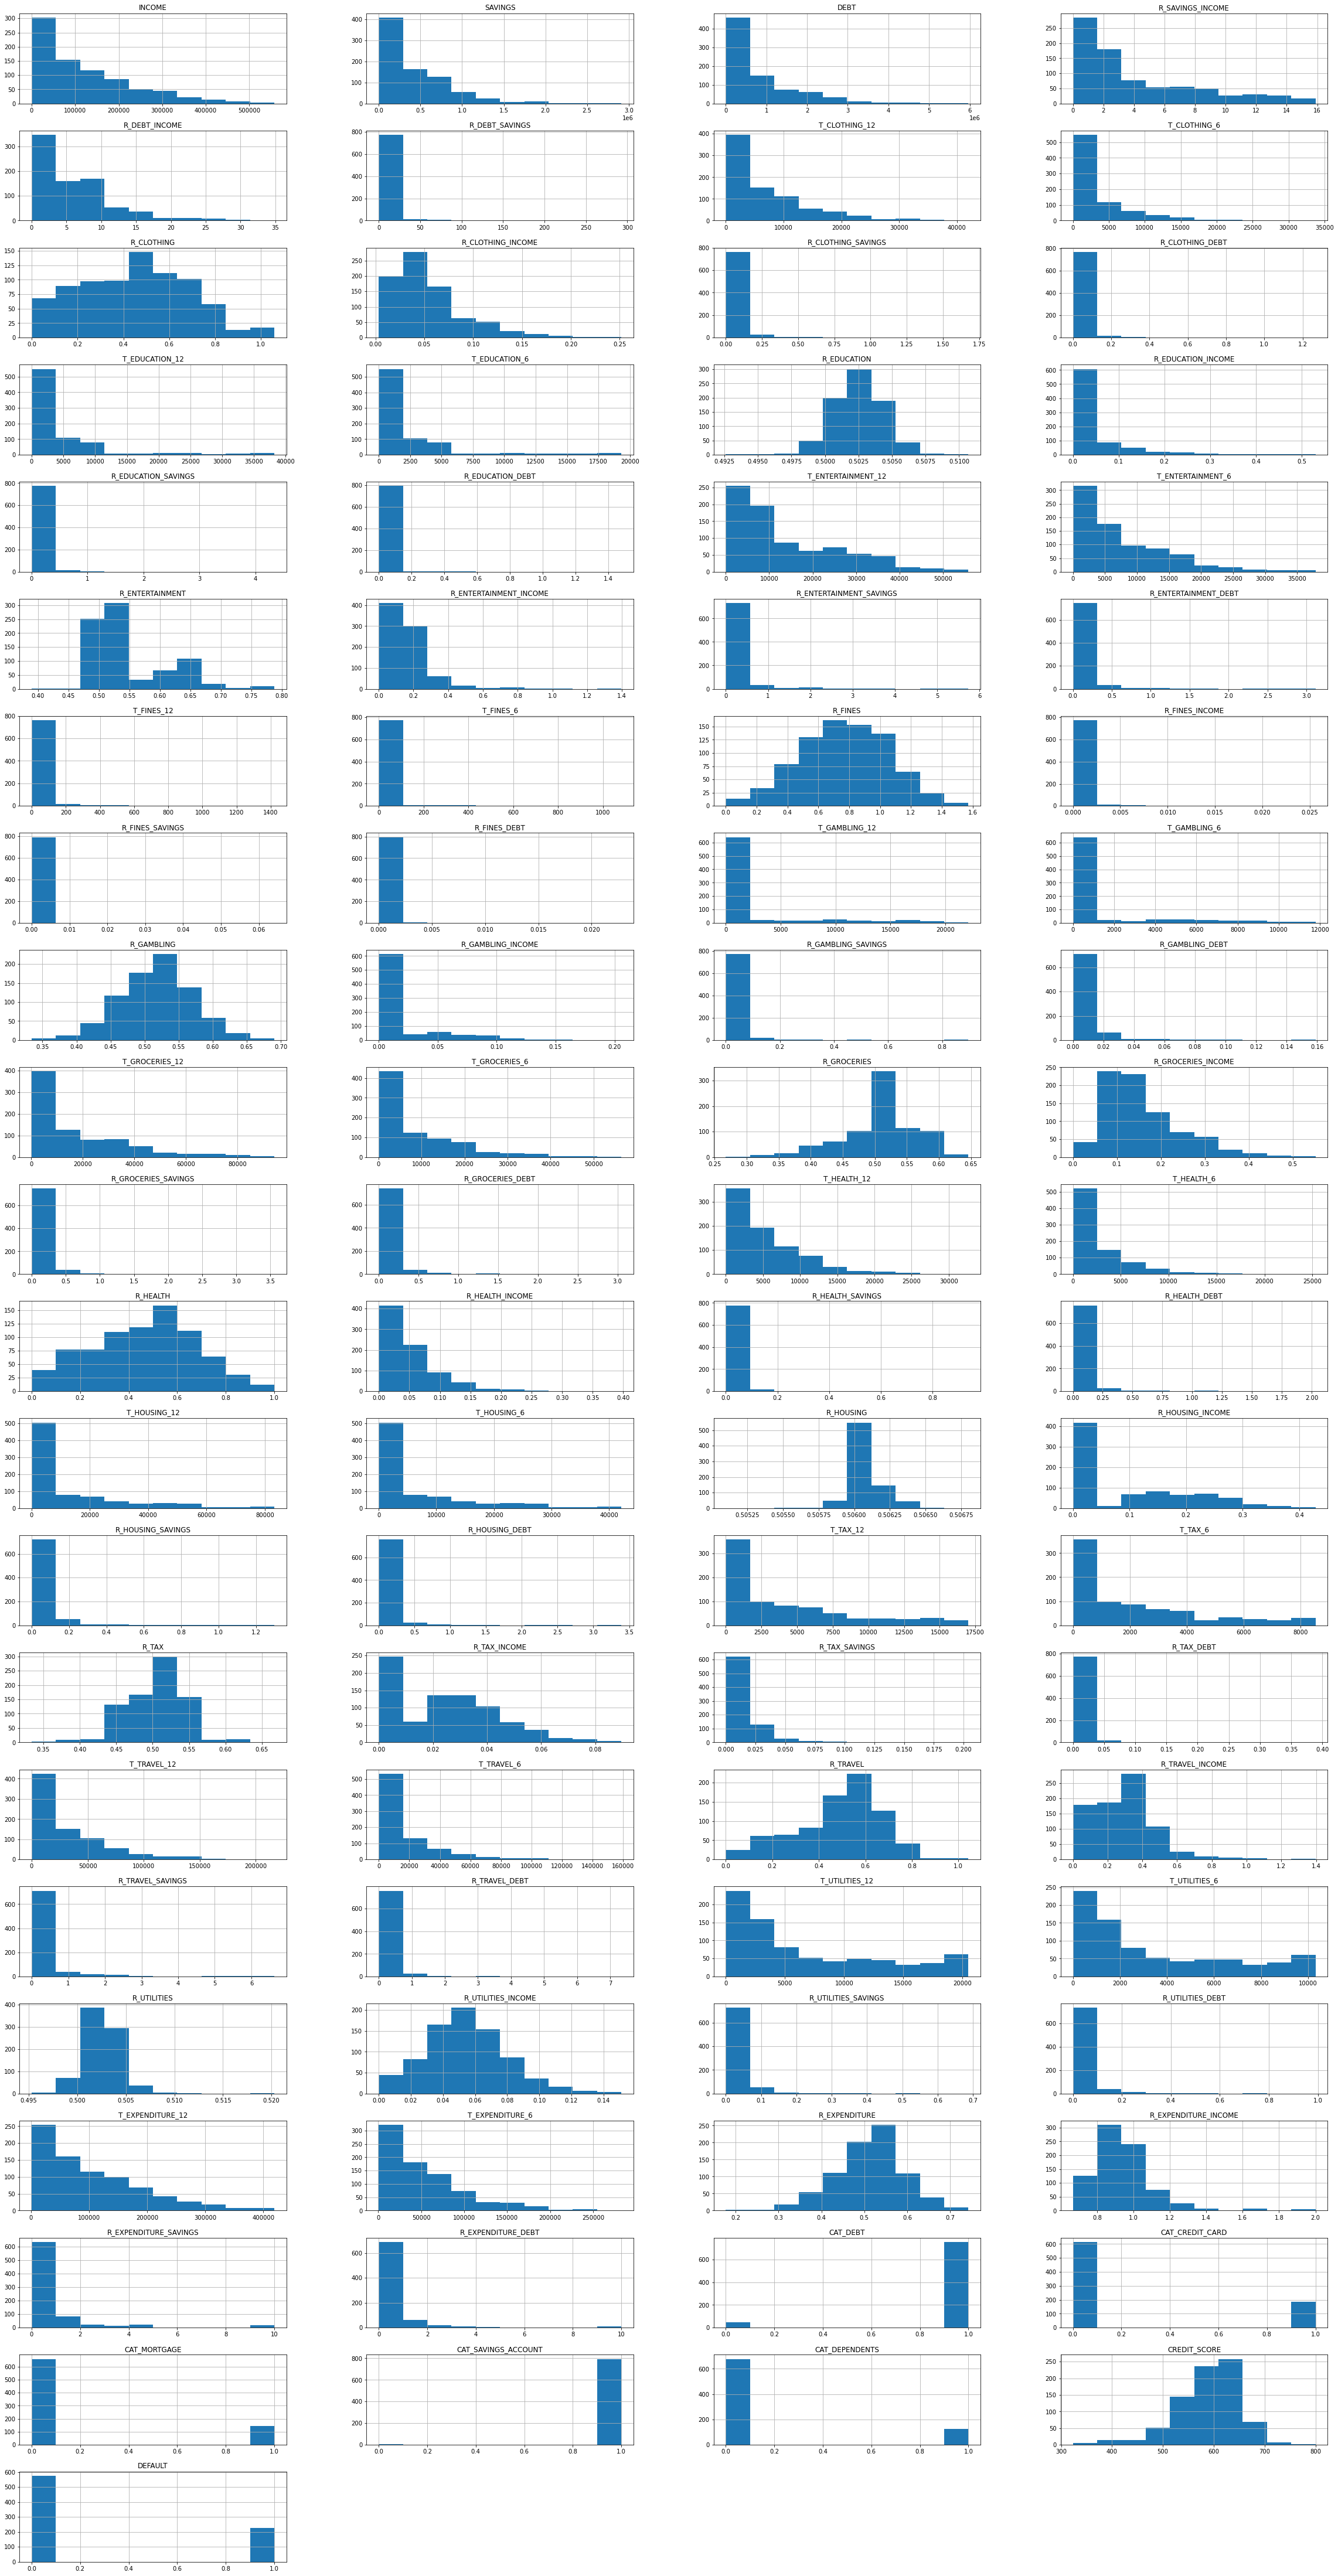

In [9]:
data.hist(figsize=(40,80), layout=(22, 4))

<p>Results from this distribution plots:</p>
<ul>
<li> </li>
<li> </li>
<li> </li>
<li> </li>
</ul>
</p>

<h3>Are there any records where R_{group} >1?  There can't be such records, because 

R_[GROUP]: Ratio of T_[GROUP]6 to T[GROUP]_12, and T_[GROUP]6 <= T[GROUP]_12</h3>

<h4>It is a good idea to check our machine lerning algorithms on r_{GROUP} = T_[GROUP]_12 to T[GROUP]_6</h4>

In [10]:
print("GROCERIES, where T_GROCERIES_6 > T_GROCERIES_12 : ", data[data['T_GROCERIES_6']>data['T_GROCERIES_12']].shape[0], ' records')
print("HOUSING, where T_HOUSING_6 > T_HOUSING_12 : ", data[data['T_HOUSING_6']>data['T_HOUSING_12']].shape[0], ' records')
print("UTILITIES, where T_UTILITIES_6 > T_UTILITIES_12 : ", data[data['T_UTILITIES_6']>data['T_UTILITIES_12']].shape[0], ' records')
print("FINES, where T_FINES_6 > T_FINES_12 : ", data[data['T_FINES_6']>data['T_FINES_12']].shape[0], ' records')
print("EDUCATION, where T_EDUCATION_6 > T_EDUCATION_12 : ", data[data['T_EDUCATION_6']>data['T_EDUCATION_12']].shape[0], ' records')
print("ENTERTAINMENT, where T_ENTERTAINMENT_6 > T_ENTERTAINMENT_12 : ", data[data['T_ENTERTAINMENT_6']>data['T_ENTERTAINMENT_12']].shape[0], ' records')
print("TRAVEL, where T_TRAVEL_6 > T_TRAVEL_12 : ", data[data['T_TRAVEL_6']>data['T_TRAVEL_12']].shape[0], ' records')
print("GAMBLING, where T_GAMBLING_6 > T_GAMBLING_12 : ", data[data['T_GAMBLING_6']>data['T_GAMBLING_12']].shape[0], ' records')
print("HEALTH, where T_HEALTH_6 > T_HEALTH_12 : ", data[data['T_HEALTH_6']>data['T_HEALTH_12']].shape[0], ' records')
print("TAX, where T_TAX_6 > T_TAX_12 : ", data[data['T_TAX_6']>data['T_TAX_12']].shape[0], ' records')
print("EXPENDITURE, where T_EXPENDITURE_6 > T_EXPENDITURE_12 : ", data[data['T_EXPENDITURE_6']>data['T_EXPENDITURE_12']].shape[0], ' records')
print("CLOTHING, where T_CLOTHING_6 > T_CLOTHING_12 : ", data[data['T_CLOTHING_6']>data['T_CLOTHING_12']].shape[0], ' records')

GROCERIES, where T_GROCERIES_6 > T_GROCERIES_12 :  0  records
HOUSING, where T_HOUSING_6 > T_HOUSING_12 :  0  records
UTILITIES, where T_UTILITIES_6 > T_UTILITIES_12 :  0  records
FINES, where T_FINES_6 > T_FINES_12 :  0  records
EDUCATION, where T_EDUCATION_6 > T_EDUCATION_12 :  0  records
ENTERTAINMENT, where T_ENTERTAINMENT_6 > T_ENTERTAINMENT_12 :  0  records
TRAVEL, where T_TRAVEL_6 > T_TRAVEL_12 :  0  records
GAMBLING, where T_GAMBLING_6 > T_GAMBLING_12 :  0  records
HEALTH, where T_HEALTH_6 > T_HEALTH_12 :  0  records
TAX, where T_TAX_6 > T_TAX_12 :  0  records
EXPENDITURE, where T_EXPENDITURE_6 > T_EXPENDITURE_12 :  0  records
CLOTHING, where T_CLOTHING_6 > T_CLOTHING_12 :  0  records


In [11]:
print("GROCERIES, where R_GROCERIES>1 :          ", data[data['R_GROCERIES']>1].shape[0], ' records')
print("HOUSING, where R_HOUSING>1:          ", data[data['R_HOUSING']>1].shape[0], ' records')
print("UTILITIES, where R_UTILITIES > 1 :            ", data[data['R_UTILITIES']>1].shape[0], ' records')
print("FINES, where R_FINES > 1 :           ", data[data['R_FINES']>1].shape[0], ' records')
print("EDUCATION, where R_EDUCATION > 1 :            ", data[data['R_EDUCATION']>1].shape[0], ' records')
print("ENTERTAINMENT, where R_ENTERTAINMENT > 1 :            ", data[data['R_ENTERTAINMENT']>1].shape[0], ' records')
print("TRAVEL, where R_TRAVEL > 1 :             ", data[data['R_TRAVEL']>1].shape[0], ' records')
print("GAMBLING, where R_GAMBLING > 1 :             ", data[data['R_GAMBLING']>1].shape[0], ' records')
print("HEALTH, where R_HEALTH > 1 :             ", data[data['R_HEALTH']>1].shape[0], ' records')
print("TAX, where R_TAX > 1 :           ", data[data['R_TAX']>1].shape[0], ' records')
print("EXPENDITURE, where R_EXPENDITURE > 1 :           ", data[data['R_EXPENDITURE']>1].shape[0], ' records')
print("CLOTHING, where R_CLOTHING > 1 :             ", data[data['R_CLOTHING']>1].shape[0], ' records')

GROCERIES, where R_GROCERIES>1 :           0  records
HOUSING, where R_HOUSING>1:           0  records
UTILITIES, where R_UTILITIES > 1 :             0  records
FINES, where R_FINES > 1 :            154  records
EDUCATION, where R_EDUCATION > 1 :             0  records
ENTERTAINMENT, where R_ENTERTAINMENT > 1 :             0  records
TRAVEL, where R_TRAVEL > 1 :              2  records
GAMBLING, where R_GAMBLING > 1 :              0  records
HEALTH, where R_HEALTH > 1 :              0  records
TAX, where R_TAX > 1 :            0  records
EXPENDITURE, where R_EXPENDITURE > 1 :            0  records
CLOTHING, where R_CLOTHING > 1 :              1  records


<h3>ratio  can't be greater than 1 in these cases, but there are such records</h3>

<h3>What if T[GROUP]_12=0? then how ratio was counted? </h3>

In [12]:
df = data[data['T_CLOTHING_12']==0]
df['R_CLOTHING'].values

array([0.3362, 0.2921, 0.5878, 0.    , 1.0583, 0.5624, 0.6241, 0.545 ,
       0.6395, 0.6529, 0.4581, 0.307 , 0.    , 0.0033, 0.3584, 0.0985,
       0.3204, 0.2484, 0.5089, 0.5791, 0.1245, 0.7705, 0.5509, 0.2638,
       0.0665, 0.2413, 0.5538, 0.6186, 0.3289, 0.4386, 0.2727, 0.2699,
       0.2371, 0.1755, 0.9927, 0.1813, 0.6631, 0.0214, 0.8779, 0.3965,
       0.0976])

In [13]:
df = data[data['T_GAMBLING_12']==0]
df['R_GAMBLING'].values

array([0.539 , 0.5395, 0.4574, 0.5216, 0.4972, 0.4782, 0.5119, 0.5625,
       0.4583, 0.5227, 0.4659, 0.498 , 0.6053, 0.5232, 0.5938, 0.4848,
       0.4612, 0.5367, 0.4829, 0.5132, 0.5768, 0.4923, 0.4748, 0.5118,
       0.5648, 0.5343, 0.4849, 0.4972, 0.4686, 0.5547, 0.5962, 0.4683,
       0.5385, 0.5332, 0.5055, 0.4452, 0.538 , 0.6347, 0.4554, 0.4964,
       0.55  , 0.5152, 0.5408, 0.5898, 0.4666, 0.5216, 0.5186, 0.5112,
       0.4527, 0.5556, 0.4795, 0.4755, 0.5161, 0.4971, 0.5077, 0.5843,
       0.5592, 0.4458, 0.5705, 0.588 , 0.4378, 0.514 , 0.5017, 0.6   ,
       0.5137, 0.5228, 0.5199, 0.5827, 0.493 , 0.4955, 0.5268, 0.4962,
       0.4475, 0.5736, 0.5269, 0.554 , 0.5847, 0.5214, 0.5144, 0.409 ,
       0.5111, 0.4725, 0.5625, 0.5595, 0.5431, 0.4461, 0.5251, 0.5485,
       0.493 , 0.5775, 0.5662, 0.5286, 0.5398, 0.4938, 0.5641, 0.4607,
       0.5921, 0.4809, 0.4623, 0.4986, 0.5222, 0.4849, 0.4841, 0.5431,
       0.5389, 0.4074, 0.5685, 0.5247, 0.433 , 0.4851, 0.5125, 0.5523,
      

In [14]:
df = data[data['T_FINES_12']==0]
df['R_FINES'].values

array([1.0388, 0.8454, 1.0253, 1.0957, 0.9546, 0.3391, 1.0391, 0.7364,
       0.5491, 0.5242, 0.9631, 0.6029, 1.0414, 0.4707, 0.8332, 0.1393,
       0.3925, 1.1203, 0.7884, 0.3163, 1.0425, 1.0845, 0.8308, 0.6793,
       0.3812, 0.8027, 0.3823, 0.8895, 0.4272, 0.7279, 0.9361, 0.3287,
       0.8171, 0.6055, 1.0613, 0.8804, 1.3401, 1.3811, 0.7844, 0.8953,
       0.5198, 1.1418, 0.9483, 1.008 , 0.3872, 0.829 , 0.8948, 0.6711,
       0.7602, 1.0424, 0.759 , 0.8032, 1.3634, 0.9517, 0.5168, 0.6653,
       0.5501, 0.9261, 0.832 , 1.1905, 0.4257, 0.4856, 1.1381, 0.6834,
       0.4016, 0.6908, 1.1637, 0.9879, 0.6407, 0.6252, 0.9336, 0.8993,
       0.7403, 0.7821, 0.6057, 0.6995, 1.3647, 0.6222, 0.7411, 0.6807,
       0.6467, 0.9901, 0.4574, 0.9536, 0.1083, 0.3342, 1.2123, 0.5912,
       0.9041, 0.9537, 1.2768, 0.8848, 0.7031, 0.505 , 0.3715, 0.1982,
       0.9355, 1.2632, 0.6704, 1.2173, 1.0142, 0.7734, 1.5731, 0.4913,
       0.8118, 1.0047, 0.3569, 0.7977, 1.4029, 1.1978, 1.0672, 0.7717,
      

<h3>Just some random values???</h3> It seems to me that this is not acceptable, because it will mess up our future ml algorithm 

<h3>Probably a feature = (T_EXPENDITURE_12 - T_EXPENDITURE_6)/T_EXPENDITURE_6 may be interesting. Because it tells us the tendency of spending money by person</h3>

In [15]:
print('GROCERIES, where T_GROCERIES_12=0 : ', data[data['T_GROCERIES_12']==0].shape[0], ' records')
print('HOUSING, where T_HOUSING_12=0 : ', data[data['T_HOUSING_12']==0].shape[0], ' records')
print('UTILITIES, where T_UTILITIES_12=0 : ', data[data['T_UTILITIES_12']==0].shape[0], ' records')
print('FINES, where T_FINES_12=0 : ', data[data['T_FINES_12']==0].shape[0], ' records')
print('EDUCATION, where T_EDUCATION_12=0 : ', data[data['T_EDUCATION_12']==0].shape[0], ' records')
print('ENTERTAINMENT, where T_ENTERTAINMENT_12=0 : ', data[data['T_ENTERTAINMENT_12']==0].shape[0], ' records')
print('TRAVEL, where T_TRAVEL_12=0 : ', data[data['T_TRAVEL_12']==0].shape[0], ' records')
print('GAMBLING, where T_GAMBLING_12=0 : ', data[data['T_GAMBLING_12']==0].shape[0], ' records')
print('HEALTH, where T_HEALTH_12=0 : ', data[data['T_HEALTH_12']==0].shape[0], ' records')
print('TAX, where T_TAX_12=0 : ', data[data['T_TAX_12']==0].shape[0], ' records')
print('EXPENDITURE, where T_EXPENDITURE_12=0 : ', data[data['T_EXPENDITURE_12']==0].shape[0], ' records')
print('CLOTHING, where T_CLOTHING_12=0 : ', data[data['T_CLOTHING_12']==0].shape[0], ' records')

GROCERIES, where T_GROCERIES_12=0 :  0  records
HOUSING, where T_HOUSING_12=0 :  421  records
UTILITIES, where T_UTILITIES_12=0 :  42  records
FINES, where T_FINES_12=0 :  745  records
EDUCATION, where T_EDUCATION_12=0 :  482  records
ENTERTAINMENT, where T_ENTERTAINMENT_12=0 :  41  records
TRAVEL, where T_TRAVEL_12=0 :  164  records
GAMBLING, where T_GAMBLING_12=0 :  500  records
HEALTH, where T_HEALTH_12=0 :  42  records
TAX, where T_TAX_12=0 :  155  records
EXPENDITURE, where T_EXPENDITURE_12=0 :  0  records
CLOTHING, where T_CLOTHING_12=0 :  41  records


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

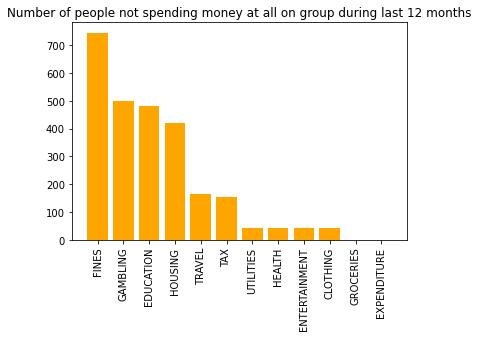

In [16]:
groups = ['GROCERIES', 'HOUSING', 'UTILITIES', 'FINES', 'EDUCATION', 'ENTERTAINMENT', 'TRAVEL', 'GAMBLING', 'HEALTH', 'TAX', 'EXPENDITURE', 'CLOTHING']
number_of_people_not_spending_on_group_12 = []

for group in groups:
    number_of_people_not_spending_on_group_12.append(data[data['T_'+group+'_12']==0].shape[0])

df = pd.DataFrame({'groups': groups, 'number_of_people_not_spending_on_group_6': number_of_people_not_spending_on_group_12, 'number_of_people_not_spending_on_group_12': number_of_people_not_spending_on_group_12})
df = df.sort_values('number_of_people_not_spending_on_group_6', ascending=False)
plt.bar(df['groups'], df['number_of_people_not_spending_on_group_6'], color='orange')
plt.title('Number of people not spending money at all on group during last 12 months')
plt.xticks(rotation=90)

<p>Results from this distribution plots:</p>
<ul>
<li> GROCERIES is a must have</li>
<li> </li>
<li> </li>
<li> </li>
</ul>
</p>

<h3>BOXPLOTS</h3>

In [17]:
baseColumns = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME',
       'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12', 'T_TAX_6', 'R_TAX',
       'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'T_TRAVEL_12',
       'T_TRAVEL_6', 'R_TRAVEL', 'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS',
       'R_TRAVEL_DEBT', 'T_UTILITIES_12', 'T_UTILITIES_6', 'R_UTILITIES',
       'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT',
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'R_EXPENDITURE',
       'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE',
       'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT']


num_cols = 2 
num_rows = (87 + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 500))

axes = axes.flatten()

for i, column in enumerate(baseColumns):
    sns.violinplot(x='DEFAULT', y=column, data=data, ax=axes[i])
    axes[i].set_title(column + ' by DEFAULT', fontsize=20)
    axes[i].set_xlabel('DEFAULT', fontsize=18)
    axes[i].set_ylabel(column, fontsize=18)
    axes[i].tick_params(axis='x', labelsize=18)
    axes[i].tick_params(axis='y', labelsize=18)


for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h3>That's interesting, but in general there is no difference in columns for people with DEFAULT=1 and DEFAULT=0. DIstributions are very very very simular for each column</h3>

<h3>HISTS divided by 'DEFAULT' (==1 blue, ==0 orange) </h3>

In [53]:
baseColumns = ['INCOME', 'SAVINGS', 'DEBT', 'R_SAVINGS_INCOME', 'R_DEBT_INCOME',
       'R_DEBT_SAVINGS', 'T_CLOTHING_12', 'T_CLOTHING_6', 'R_CLOTHING',
       'R_CLOTHING_INCOME', 'R_CLOTHING_SAVINGS', 'R_CLOTHING_DEBT',
       'T_EDUCATION_12', 'T_EDUCATION_6', 'R_EDUCATION', 'R_EDUCATION_INCOME',
       'R_EDUCATION_SAVINGS', 'R_EDUCATION_DEBT', 'T_ENTERTAINMENT_12',
       'T_ENTERTAINMENT_6', 'R_ENTERTAINMENT', 'R_ENTERTAINMENT_INCOME',
       'R_ENTERTAINMENT_SAVINGS', 'R_ENTERTAINMENT_DEBT', 'T_FINES_12',
       'T_FINES_6', 'R_FINES', 'R_FINES_INCOME', 'R_FINES_SAVINGS',
       'R_FINES_DEBT', 'T_GAMBLING_12', 'T_GAMBLING_6', 'R_GAMBLING',
       'R_GAMBLING_INCOME', 'R_GAMBLING_SAVINGS', 'R_GAMBLING_DEBT',
       'T_GROCERIES_12', 'T_GROCERIES_6', 'R_GROCERIES', 'R_GROCERIES_INCOME',
       'R_GROCERIES_SAVINGS', 'R_GROCERIES_DEBT', 'T_HEALTH_12', 'T_HEALTH_6',
       'R_HEALTH', 'R_HEALTH_INCOME', 'R_HEALTH_SAVINGS', 'R_HEALTH_DEBT',
       'T_HOUSING_12', 'T_HOUSING_6', 'R_HOUSING', 'R_HOUSING_INCOME',
       'R_HOUSING_SAVINGS', 'R_HOUSING_DEBT', 'T_TAX_12', 'T_TAX_6', 'R_TAX',
       'R_TAX_INCOME', 'R_TAX_SAVINGS', 'R_TAX_DEBT', 'T_TRAVEL_12',
       'T_TRAVEL_6', 'R_TRAVEL', 'R_TRAVEL_INCOME', 'R_TRAVEL_SAVINGS',
       'R_TRAVEL_DEBT', 'T_UTILITIES_12', 'T_UTILITIES_6', 'R_UTILITIES',
       'R_UTILITIES_INCOME', 'R_UTILITIES_SAVINGS', 'R_UTILITIES_DEBT',
       'T_EXPENDITURE_12', 'T_EXPENDITURE_6', 'R_EXPENDITURE',
       'R_EXPENDITURE_INCOME', 'R_EXPENDITURE_SAVINGS', 'R_EXPENDITURE_DEBT',
       'CAT_GAMBLING', 'CAT_DEBT', 'CAT_CREDIT_CARD', 'CAT_MORTGAGE',
       'CAT_SAVINGS_ACCOUNT', 'CAT_DEPENDENTS', 'CREDIT_SCORE', 'DEFAULT']


num_cols = 2 
num_rows = (len(baseColumns) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(40, 500))

axes = axes.flatten()

for i, column in enumerate(baseColumns):
    try:
        sns.histplot(x=data[column], hue=data['DEFAULT'], ax=axes[i], bins=20, alpha=0.5)
        axes[i].set_title(column)
    except KeyError:
        print(f"Column '{column}' not found in the DataFrame.")

for j in range(i+1, num_rows*num_cols):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<h1>SOME QUESTIONS RELATED TO DATA </h1>

<h3>Do people with dependents spend more money on education than people without dependents?</h3>